In [1]:
#!git clone https://github.com/pieper/dicomsort.git
!pip install pydicom
#!python dicomsort/dicomsort.py --help

     |████████████████████████████████| 2.0 MB 9.7 MB/s eta 0:00:01


In [2]:
!pip install pylidc

     |████████████████████████████████| 5.6 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 67.4 MB/s eta 0:00:01
     |████████████████████████████████| 30.2 MB 64.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 60.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 66.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 63.6 MB/s eta 0:00:01
     |████████████████████████████████| 171 kB 86.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 66.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 66.4 MB/s eta 0:00:01
     |████████████████████████████████| 150 kB 61.2 MB/s eta 0:00:01


In [3]:
import pylidc as pl
from pylidc.utils import consensus
import pydicom as dicom
from skimage.measure import find_contours
#import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd

In [4]:
pl.query(pl.Scan).count()
pid = 'LIDC-IDRI-0001'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
scan.study_instance_uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288633453246975630178'

### Download the data from IDC

In [5]:
myProjectID = "idc-external-012"

In [6]:
# from google.colab import auth
# auth.authenticate_user()

In [233]:
pip install google-cloud-bigquery

     |████████████████████████████████| 201 kB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 92 kB 704 kB/s  eta 0:00:01
     |████████████████████████████████| 75 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 4.3 MB 68.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.8 MB/s  eta 0:00:01
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0+nv requires grpcio~=1.34.0, but you have grpcio 1.40.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [234]:
!pip install --upgrade google-auth-oauthlib

  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.5
    Uninstalling google-auth-oauthlib-0.4.5:
      Successfully uninstalled google-auth-oauthlib-0.4.5


In [235]:
from google_auth_oauthlib import flow

# TODO: Uncomment the line below to set the `launch_browser` variable.
launch_browser = False
#
# The `launch_browser` boolean variable indicates if a local server is used
# as the callback URL in the auth flow. A value of `True` is recommended,
# but a local server does not work if accessing the application remotely,
# such as over SSH or from a remote Jupyter notebook.

appflow = flow.InstalledAppFlow.from_client_secrets_file(
    "client_secret_desktop.json", scopes=["https://www.googleapis.com/auth/bigquery"]
)

if launch_browser:
    appflow.run_local_server()
else:
    appflow.run_console()

credentials = appflow.credentials

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=354066013909-il5lh54dbass54iv45m7thff0uuefjar.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=YBVzEphzTNFS70dMdospF6FzLZMW91&prompt=consent&access_type=offline


Enter the authorization code:  4/1AX4XfWgMOsrjSrQePTSXoxUmc9UEu0i8fbQxt5BT5-JE3Hq9jZOYuLDJnzs


In [236]:
!pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

     |████████████████████████████████| 23.6 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 131 kB 83.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 80.9 MB/s eta 0:00:01
     |████████████████████████████████| 514 kB 84.7 MB/s eta 0:00:01


In [238]:
%load_ext google.cloud.bigquery

In [239]:
credentials

In [240]:
from google.cloud.bigquery import magics
magics.context.credentials = credentials

In [14]:
%%bigquery
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

Downloading: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00, 11.83rows/s]


year  birth_count
0   2008      4255156
1   2007      4324008
2   2006      4273225
3   2005      4145619
4   2004      4118907
5   2003      4096092
6   2002      4027376
7   2001      4031531
8   2000      4063823
9   1999      3963465
10  1998      3945192
11  1997      3884329
12  1996      3894874
13  1995      3903012
14  1994      3956925

In [267]:
%%bigquery CT_columns --project=$myProjectID 

select * FROM `canceridc-data.idc_views.dicom_all` where Modality = "CT" limit 1
# WITH
#   all_lidc_ct_series AS (
#   SELECT
#     DISTINCT(SeriesInstanceUID),
#     StudyInstanceUID,  
#     PatientID,
#     SliceThickness,
#     ARRAY_TO_STRING(PixelSpacing,"/") as pixelspa 
#   FROM
#     `canceridc-data.idc_views.dicom_all`
#   WHERE
#     Modality = "CT"
#     AND collection_id = "lidc_idri")
# SELECT PatientID,SliceThickness,pixelspa,StudyInstanceUID,SeriesInstanceUID FROM
#   all_lidc_ct_series
# ORDER BY
#   PatientID

Downloading: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.02s/rows]


In [268]:
CT_columns.columns.to_list()

['Source_DOI',
 'tcia_tumorLocation',
 'tcia_species',
 'tcia_cancerType',
 'collection_id',
 'gcs_url',
 'gcs_bucket',
 'gcs_generation',
 'crdc_study_uuid',
 'crdc_series_uuid',
 'crdc_instance_uuid',
 'MediaStorageSOPClassUID',
 'MediaStorageSOPInstanceUID',
 'TransferSyntaxUID',
 'ImplementationClassUID',
 'ImplementationVersionName',
 'SourceApplicationEntityTitle',
 'ReferencedFileID',
 'LengthToEnd',
 'SpecificCharacterSet',
 'ImageType',
 'RecognitionCode',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceCreatorUID',
 'SOPClassUID',
 'SOPInstanceUID',
 'StudyDate',
 'SeriesDate',
 'AcquisitionDate',
 'ContentDate',
 'OverlayDate',
 'CurveDate',
 'AcquisitionDateTime',
 'StudyTime',
 'SeriesTime',
 'AcquisitionTime',
 'ContentTime',
 'DataSetType',
 'DataSetSubtype',
 'AccessionNumber',
 'RetrieveAETitle',
 'Modality',
 'ModalitiesInStudy',
 'ConversionType',
 'PresentationIntentType',
 'Manufacturer',
 'CodingSchemeDesignator',
 'CodingSchemeIdentificationSequence',

In [285]:


%%bigquery CT_details --project=$myProjectID 
#tcia_tumorLocation
WITH
  all_lidc_ct_series AS (
  SELECT
    DISTINCT(SeriesInstanceUID),
    StudyInstanceUID,  
    PatientID,
    SliceThickness,
      SpacingBetweenSlices,
      SliceLocation,
      NumberOfSlices,
      SliceSensitivityFactor,
      tcia_tumorLocation,
      BodyPartThickness,
    ARRAY_TO_STRING(PixelSpacing,"/") as pixelspa 
  FROM
    `canceridc-data.idc_views.dicom_all`
  WHERE
    Modality = "CT"
    AND collection_id = "lidc_idri")
SELECT PatientID,SliceThickness,SpacingBetweenSlices,
      SliceLocation,
      NumberOfSlices,
      SliceSensitivityFactor,pixelspa,StudyInstanceUID,SeriesInstanceUID,tcia_tumorLocation,BodyPartThickness FROM
  all_lidc_ct_series
ORDER BY
  PatientID

Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████| 243945/243945 [00:01<00:00, 212800.77rows/s]


In [286]:
CT_details.head()

PatientID SliceThickness SpacingBetweenSlices SliceLocation  \
0  LIDC-IDRI-0001       2.500000                 None   -172.500000   
1  LIDC-IDRI-0001       2.500000                 None   -297.500000   
2  LIDC-IDRI-0001       2.500000                 None    -20.000000   
3  LIDC-IDRI-0001       2.500000                 None   -235.000000   
4  LIDC-IDRI-0001       2.500000                 None   -162.500000   

   NumberOfSlices SliceSensitivityFactor           pixelspa  \
0             NaN                   None  0.703125/0.703125   
1             NaN                   None  0.703125/0.703125   
2             NaN                   None  0.703125/0.703125   
3             NaN                   None  0.703125/0.703125   
4             NaN                   None  0.703125/0.703125   

                                    StudyInstanceUID  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...   

                                   SeriesInstanceUID tcia_tumorLocation  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...              Chest   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...              Chest   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...              Chest   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...              Chest   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...              Chest   

  BodyPartThickness  
0              None  
1              None  
2              None  
3              None  
4              None

In [257]:
%%bigquery CT_series --project=$myProjectID 

WITH
  all_lidc_ct_series AS (
  SELECT
    DISTINCT(SeriesInstanceUID),
    StudyInstanceUID,  
    PatientID,
    SliceThickness,
    ARRAY_TO_STRING(PixelSpacing,"/") as pixelspa 
  FROM
    `canceridc-data.idc_views.dicom_all`
  WHERE
    Modality = "CT"
    AND collection_id = "lidc_idri")
SELECT PatientID,SliceThickness,pixelspa,StudyInstanceUID,SeriesInstanceUID FROM
  all_lidc_ct_series
ORDER BY
  PatientID

Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1018/1018 [00:01<00:00, 815.09rows/s]


In [243]:
print(CT_series.shape)
CT_series.head()

(1018, 5)


PatientID SliceThickness           pixelspa  \
0  LIDC-IDRI-0001       2.500000  0.703125/0.703125   
1  LIDC-IDRI-0002       1.250000  0.681641/0.681641   
2  LIDC-IDRI-0003       2.500000  0.820312/0.820312   
3  LIDC-IDRI-0004       1.250000  0.822266/0.822266   
4  LIDC-IDRI-0005       2.500000  0.664062/0.664062   

                                    StudyInstanceUID  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.490157381160...   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.101370605276...   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.191425307197...   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.190188259083...   

                                   SeriesInstanceUID  
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...  
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.619372068417...  
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...  
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.323541312620...  
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.129007566048...

In [18]:
!pip install seaborn

     |████████████████████████████████| 292 kB 7.3 MB/s eta 0:00:01


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'PixelSpacing, mm')]

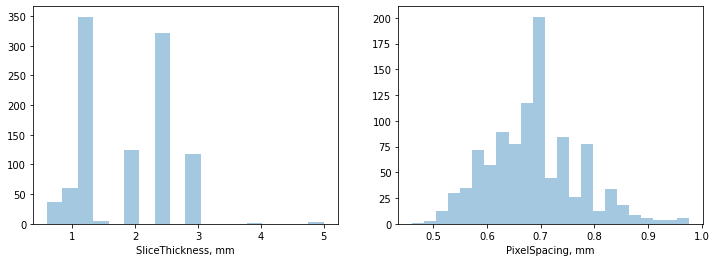

In [19]:
%matplotlib inline
import seaborn as sb
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax=sb.distplot(CT_series["SliceThickness"].astype(float),kde=False)
ax.set(xlabel="SliceThickness, mm")

plt.subplot(1,2,2)
xSpacing = CT_series["pixelspa"].str.split('/',n=1,expand=True)[0].astype(float)
ax=sb.distplot(xSpacing, kde=False)
ax.set(xlabel="PixelSpacing, mm")

In [287]:
import pandas as pd
s_1,s_2,s_3 = 50,50,50
ct_series_1 = CT_series[CT_series["SliceThickness"].astype(float)==1.0]
ct_series_2 = CT_series[CT_series["SliceThickness"].astype(float)==2.0]
ct_series_3 = CT_series[CT_series["SliceThickness"].astype(float)==3.0]
ct_series_HR = pd.concat([ct_series_1[:s_1],ct_series_2[:s_2],ct_series_3[:s_3]])

In [288]:
to_download = []
base_gs_uri = 'gs://idc-tcia-lidc-idri/dicom/'

for i in range(ct_series_HR.shape[0]):
    to_download.append(base_gs_uri + ct_series_HR.iloc[i]['StudyInstanceUID'] + '/' + ct_series_HR.iloc[i]['SeriesInstanceUID'])

manifest_df = pd.DataFrame({"gcs":to_download},columns=["gcs"])

In [289]:
manifest_df.head()

gcs
0  gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.1451...
1  gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.1451...
2  gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.1451...
3  gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.1451...
4  gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.1451...

In [290]:
manifest_df.to_csv("gcs_paths_3.txt",header=False, index=False)
!head gcs_paths_3.txt

gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.135045503670480596826162811572/1.3.6.1.4.1.14519.5.2.1.6279.6001.326057189095429101398977448288
gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.165017330457520545748655969705/1.3.6.1.4.1.14519.5.2.1.6279.6001.324290109423920971676288828329
gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.265704884949271879044145982159/1.3.6.1.4.1.14519.5.2.1.6279.6001.154677396354641150280013275227
gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.815399168774050638734383723372/1.3.6.1.4.1.14519.5.2.1.6279.6001.725023183844147505748475581290
gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.311849240521371267537044867782/1.3.6.1.4.1.14519.5.2.1.6279.6001.387954549120924524005910602207
gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.461502489756528153281751961352/1.3.6.1.4.1.14519.5.2.1.6279.6001.272042302501586336192628818865
gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.

In [291]:
!pip install gsutil

     |████████████████████████████████| 2.9 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 135 kB 65.3 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 54 kB 5.8 MB/s  eta 0:00:01
     |████████████████████████████████| 1.4 MB 44.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 60.2 MB/s eta 0:00:01
  Created wheel for gsutil: filename=gsutil-5.0-py3-none-any.whl size=3713420 sha256=7e4249fb701333ff31b7c085fd62dc95b23b166fc4eca3e88bd5684217151bce
  Stored in directory: /root/.cache/pip/wheels/3a/7c/68/4e828ee83d2d4806ff6d56d8deb6835ffec288abf82de57470
  Created wheel for crcmod: filename=crcmod-1.7-cp38-cp38-linux_x86_64.whl size=36029 sha256=563cac528ec9914f58d182126c74a807d2c570f54d2dde2c1a1995aca9d2de6a
  Stored in directory: /root/.cache/pi

In [292]:
!rm -rf downloaded_cohort_3

In [ ]:
!mkdir downloaded_cohort_3
!cat gcs_paths_3.txt | gsutil -u $myProjectID -m cp -Ir ./downloaded_cohort_3

Copying gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.135045503670480596826162811572/1.3.6.1.4.1.14519.5.2.1.6279.6001.326057189095429101398977448288/1.3.6.1.4.1.14519.5.2.1.6279.6001.100191094280203283283021962486.dcm...
Copying gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.135045503670480596826162811572/1.3.6.1.4.1.14519.5.2.1.6279.6001.326057189095429101398977448288/1.3.6.1.4.1.14519.5.2.1.6279.6001.101886964201437446907268755262.dcm...
Copying gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.135045503670480596826162811572/1.3.6.1.4.1.14519.5.2.1.6279.6001.326057189095429101398977448288/1.3.6.1.4.1.14519.5.2.1.6279.6001.102247975018680800877284400958.dcm...
Copying gs://idc-tcia-lidc-idri/dicom/1.3.6.1.4.1.14519.5.2.1.6279.6001.135045503670480596826162811572/1.3.6.1.4.1.14519.5.2.1.6279.6001.326057189095429101398977448288/1.3.6.1.4.1.14519.5.2.1.6279.6001.105694608707088632797697113433.dcm...
Copying gs://idc-tcia-lidc-idri/dicom/1.

In [16]:
!python dicomsort/dicomsort.py -u downloaded_cohort_3 cohort_sorted_3/%PatientID/%StudyInstanceUID/%SeriesInstanceUID/%SOPInstanceUID.dcm

  0%|                                                  | 0/3448 [00:00<?, ?it/s]
Source file: downloaded_cohort_3/1.3.6.1.4.1.14519.5.2.1.6279.6001.288701997968615460794642979503/1.3.6.1.4.1.14519.5.2.1.6279.6001.284310817653432386643042030032.dcm
Target file: cohort_sorted_3/LIDC-IDRI-0084/1.3.6.1.4.1.14519.5.2.1.6279.6001.198480745206106280149820227940/1.3.6.1.4.1.14519.5.2.1.6279.6001.288701997968615460794642979503/1.3.6.1.4.1.14519.5.2.1.6279.6001.284310817653432386643042030032.dcm

Target file already exists - pattern is probably not unique
Aborting to avoid data loss.
  0%|                                                  | 0/3448 [00:00<?, ?it/s]


In [6]:
import os
data_folder = os.getcwd() + '/cohort_sorted_3/'
data_folder

'/app/cohort_sorted_3/'

In [7]:
#f = open ('.pylidcrc','w')            #For GCP
f = open ('/root/.pylidcrc','w')    #For Colab
f.write('[dicom]'+'\n')
f.write('path =' + data_folder +'\n')
f.write('warn = True')
f.close()

Current patient ID = LIDC-IDRI-0098
Loading dicom files ... This may take a moment.


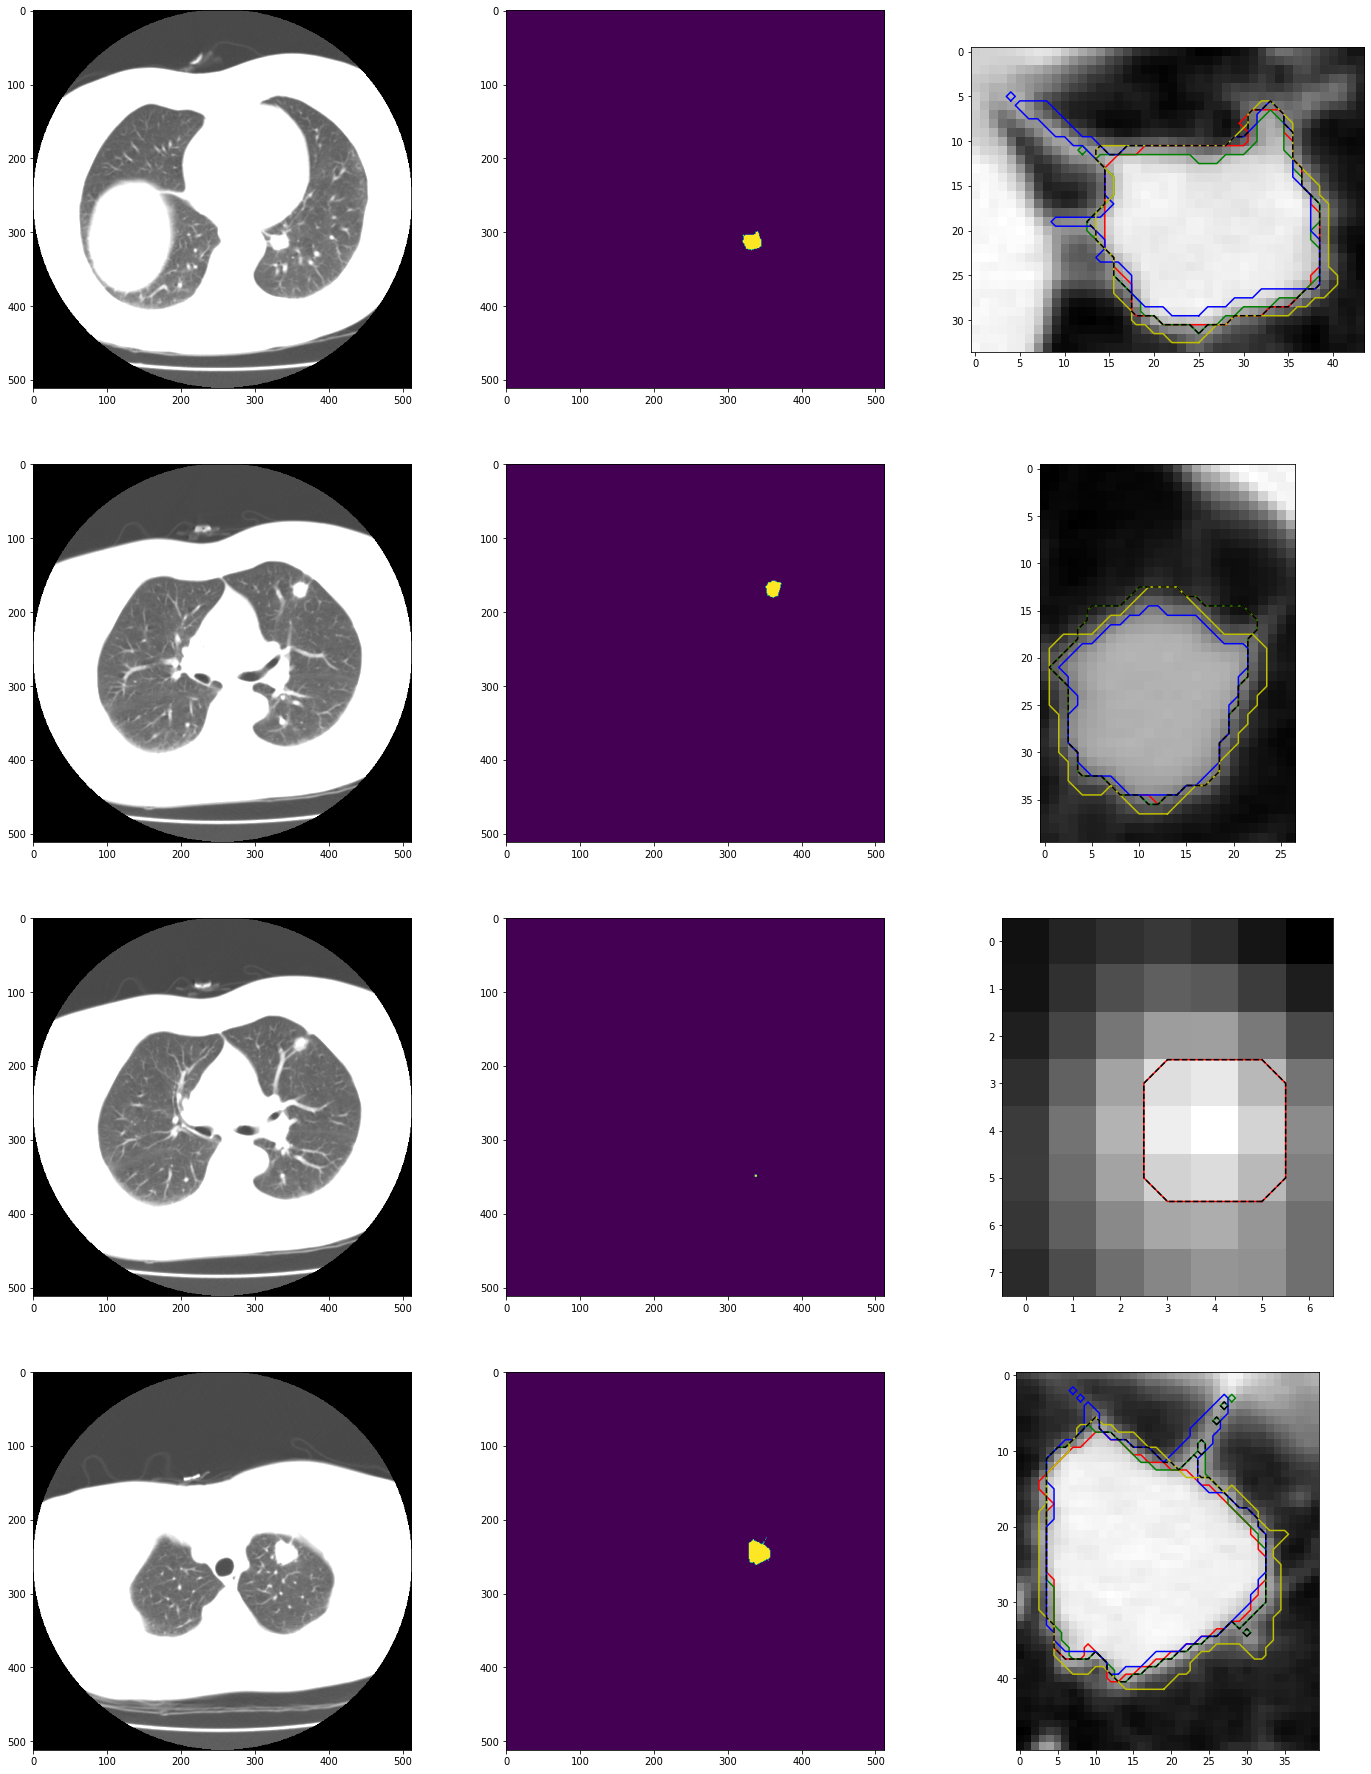

In [8]:
%matplotlib inline

cohort = data_folder
patient_list = os.listdir(cohort)
patient_select = 0

print ("Current patient ID =", patient_list[patient_select])

scan = pl.query(pl.Scan).filter(pl.Scan.patient_id.in_(patient_list))
nodules_annotation = scan[patient_select].cluster_annotations()
vol = scan[patient_select].to_volume()

cmask_CT = []
cbbox_CT = []
masks_CT = []
for nodule_idx, nodule in enumerate(nodules_annotation):
    cmask, cbbox, masks = consensus(nodule)
    cmask_CT.append(cmask)
    cbbox_CT.append(cbbox)
    masks_CT.append(masks)   

nodule_num = len(cmask_CT)
plt.figure(figsize=(8*3,8*nodule_num))
for i in range(nodule_num):
    cmask = cmask_CT[i]
    cbbox = cbbox_CT[i]
    masks = masks_CT[i]
    k = int(0.5*(cbbox[2].stop - cbbox[2].start))
    k_slice = k + cbbox[2].start
    plt.subplot(nodule_num,3,1+i*3)
    plt.imshow(vol[:,:,k_slice],cmap='gray')
    plt.clim(vmin=-1350,vmax=-150)
    
    plt.subplot(nodule_num,3,2+i*3)
    CT_mask = np.zeros_like(vol)
    CT_mask[cbbox] = cmask
    plt.imshow(CT_mask[:,:,k_slice])

    plt.subplot(nodule_num,3,3+i*3)
    plt.imshow(vol[cbbox][:,:,k],cmap='gray')
    # Plot the annotation contours for the kth slice.
    colors = ['r', 'g', 'b', 'y']
    for j in range(len(masks)):
        for c in find_contours(masks[j][:,:,k].astype(float), 0.5):
            label = "Annotation %d" % (j+1)
            plt.plot(c[:,1], c[:,0], colors[j], label=label)

    # Plot the 50% consensus contour for the kth slice.
    for c in find_contours(cmask[:,:,k].astype(float), 0.5):
        plt.plot(c[:,1], c[:,0], '--k', label='50% Consensus')

In [9]:

CT_image_data = []
CT_mask_data  = []

for pa in range(len(patient_list)):
    print ("Current patient ID =", patient_list[pa])
    
    scan = pl.query(pl.Scan).filter(pl.Scan.patient_id.in_(patient_list))
    nodules_annotation = scan[pa].cluster_annotations()
    vol = scan[pa].to_volume()
    
    CT_image_data.append(vol)
    
    cmask_CT = []
    cbbox_CT = []
    masks_CT = []
    for nodule_idx, nodule in enumerate(nodules_annotation):
        cmask, cbbox, masks = consensus(nodule)
        cmask_CT.append(cmask)
        cbbox_CT.append(cbbox)
        masks_CT.append(masks)   

    CT_mask = np.zeros_like(vol)    
    nodule_num = len(cmask_CT)
    print("Length of nodules = {}".format(nodule_num))
    for i in range(nodule_num):
        cmask = cmask_CT[i]
        cbbox = cbbox_CT[i]
        masks = masks_CT[i]    
        CT_mask[cbbox] += cmask
        print("Unique labels in mask = {}".format(np.unique(CT_mask[cbbox])))
        
    CT_mask_data.append(CT_mask)

Current patient ID = LIDC-IDRI-0098
Loading dicom files ... This may take a moment.
Length of nodules = 4
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Current patient ID = LIDC-IDRI-0086
Loading dicom files ... This may take a moment.
Length of nodules = 3
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Current patient ID = LIDC-IDRI-0084
Loading dicom files ... This may take a moment.
Length of nodules = 1
Unique labels in mask = [0 1]
Current patient ID = LIDC-IDRI-0325
Loading dicom files ... This may take a moment.
Length of nodules = 1
Unique labels in mask = [0 1]
Current patient ID = LIDC-IDRI-0106
Loading dicom files ... This may take a moment.
Length of nodules = 6
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Unique labels in mask = [0 1]
Current patient ID =

In [10]:
import tensorflow as tf

2021-09-23 07:15:32.560610: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcudart.so.11.0


In [11]:
def normalize(input_image):#, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    #input_mask -= 1
    return input_image#, input_mask

In [12]:
def load_image(CT_image_data, CT_mask_data):
    #use nearest, to prevent the labels from changing
    input_image = CT_image_data#tf.image.resize(CT_image_data, (128, 128), method='nearest')
    #input_mask = tf.image.resize(CT_mask_data, (128, 128), method='nearest')
    input_mask = CT_mask_data#tf.image.resize(CT_mask_data, (128, 128), method='nearest')

    input_image = normalize(input_image)

    return input_image, input_mask

In [18]:
inp, msk = load_image(CT_image_data[0], CT_mask_data[0])
print(inp.shape, msk.shape)

(512, 512, 87) (512, 512, 87)


2021-09-19 06:11:40.471953: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcuda.so.1
2021-09-19 06:11:41.084717: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-19 06:11:41.085376: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1734] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-09-19 06:11:41.085460: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcudart.so.11.0
2021-09-19 06:11:41.092017: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcublas.so.11
2021-09-19 06:11:41.092106: I tensorflow/stream_executor/platform/default/

In [208]:
def train_test_split(CT_image_data, CT_mask_data, split = 0.7):
    assert len(CT_image_data) == len(CT_mask_data)
    num_samples = len(CT_image_data)
    idxs = np.arange(num_samples)
    np.random.shuffle(idxs)
    return CT_image_data[:int(num_samples*split)], CT_mask_data[:int(num_samples*split)],CT_image_data[int(num_samples*split):], CT_mask_data[int(num_samples*split):]

In [209]:
CT_image_data_train, CT_mask_data_train, CT_image_data_test, CT_mask_data_test = train_test_split(CT_image_data, CT_mask_data)

In [210]:
# alternate, for more than one patient
# get the dataset generator
def get_train_data_generator_bodytext(CT_image_data, CT_mask_data):
    for i in range(len(CT_image_data)):
        for j in range(CT_image_data[i].shape[2]):
            image, mask = load_image(tf.expand_dims(CT_image_data[i][:,:,j], -1), tf.expand_dims(CT_mask_data[i][:,:,j], -1))
            yield image, tf.keras.utils.to_categorical(mask, num_classes=2)
        # yield image, mask
def get_train_dataset(CT_image_data, CT_mask_data):
    generator = lambda: get_train_data_generator_bodytext(CT_image_data, CT_mask_data)
    return tf.data.Dataset.from_generator(
        generator, output_signature=(
            tf.TensorSpec(shape=(512, 512, 1), dtype=tf.float32),
            tf.TensorSpec(shape=(512, 512, 2), dtype=tf.float32)))

In [13]:
# # alternate, for more than one patient
# # get the dataset generator
# def get_train_data_generator_bodytext(CT_image_data, CT_mask_data):
#     for i in range(len(CT_image_data)):
#         for j in range(CT_image_data[i].shape[2]):
#             image, mask = load_image(tf.expand_dims(CT_image_data[i][:,:,j], -1), tf.expand_dims(CT_mask_data[i][:,:,j], -1))
#             yield image, mask
#         # yield image, mask
# def get_train_dataset(CT_image_data, CT_mask_data):
#     generator = lambda: get_train_data_generator_bodytext(CT_image_data, CT_mask_data)
#     return tf.data.Dataset.from_generator(
#         generator, output_signature=(
#             tf.TensorSpec(shape=(512, 512, 1), dtype=tf.float32),
#             tf.TensorSpec(shape=(512, 512, 1), dtype=tf.float32)))

In [84]:
tf.__version__

'2.5.0'

In [211]:
ds_train = get_train_dataset(CT_image_data_train,CT_mask_data_train)
ds_train.element_spec

(TensorSpec(shape=(512, 512, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(512, 512, 2), dtype=tf.float32, name=None))

In [212]:
ds_test = get_train_dataset(CT_image_data_test,CT_mask_data_test)
ds_test.element_spec

(TensorSpec(shape=(512, 512, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(512, 512, 2), dtype=tf.float32, name=None))

In [213]:
for d, l in ds_train.take(1):
    print(l.shape)

(512, 512, 2)


In [214]:
for d, l in ds_test.take(1):
    print(l.shape)

(512, 512, 2)


In [196]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        #print(display_list[i])
        plt.imshow(display_list[i])
        #plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

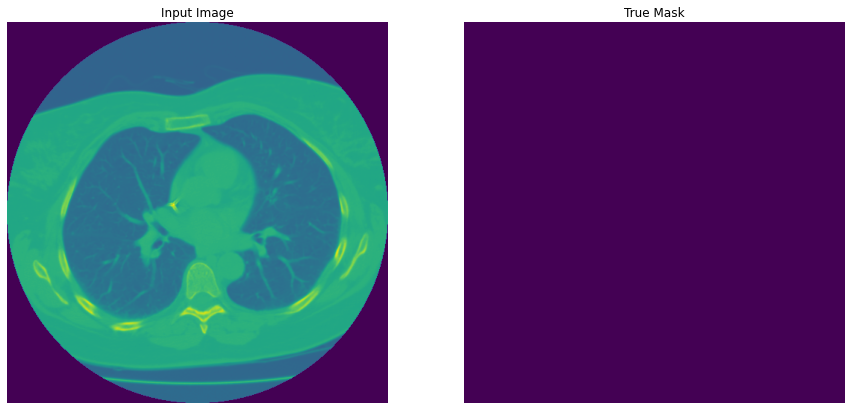

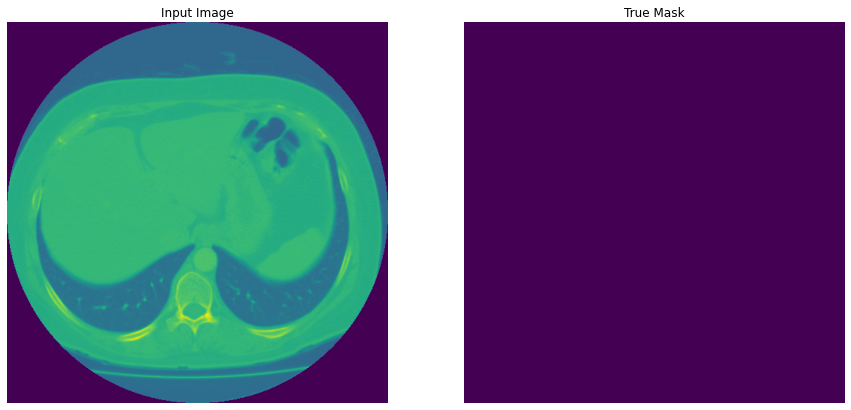

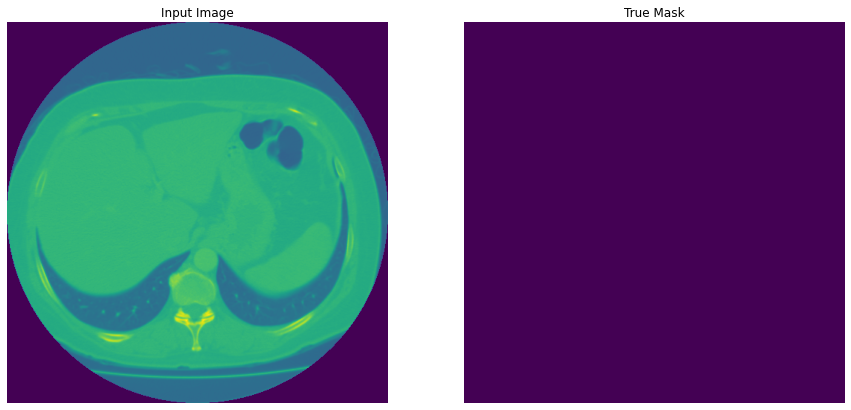

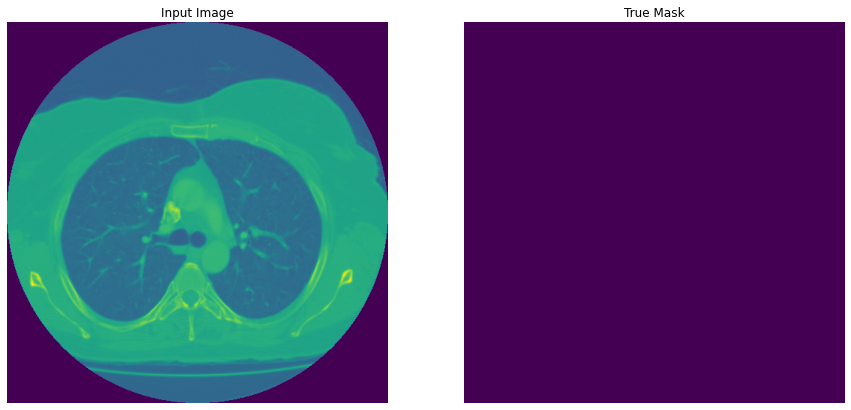

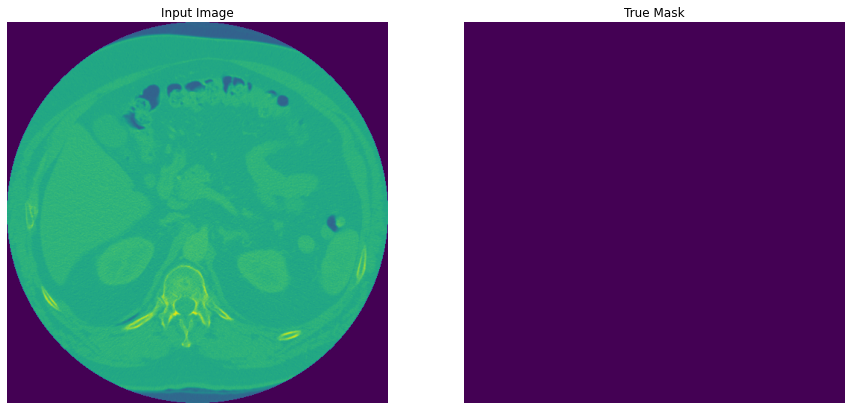

In [197]:
for images, masks in ds_train.shuffle(300).take(5):
    sample_image, sample_mask = images[:,:,0], masks[:,:,0]
    display([sample_image, sample_mask])

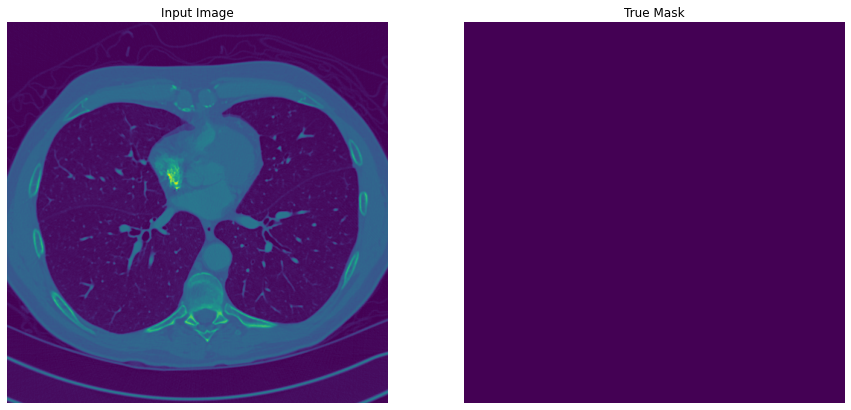

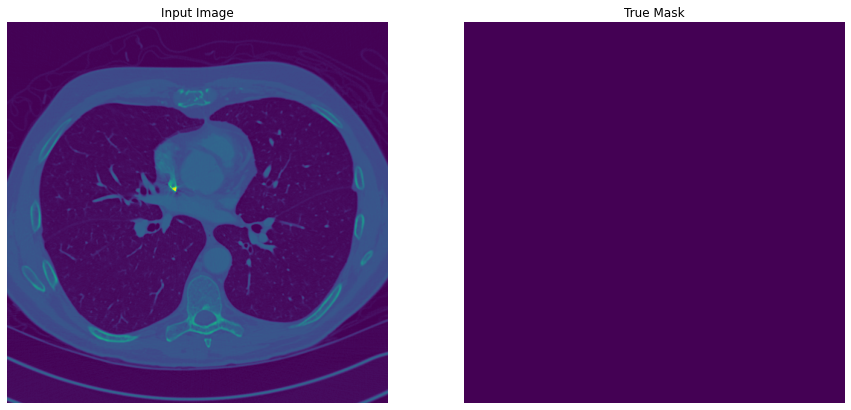

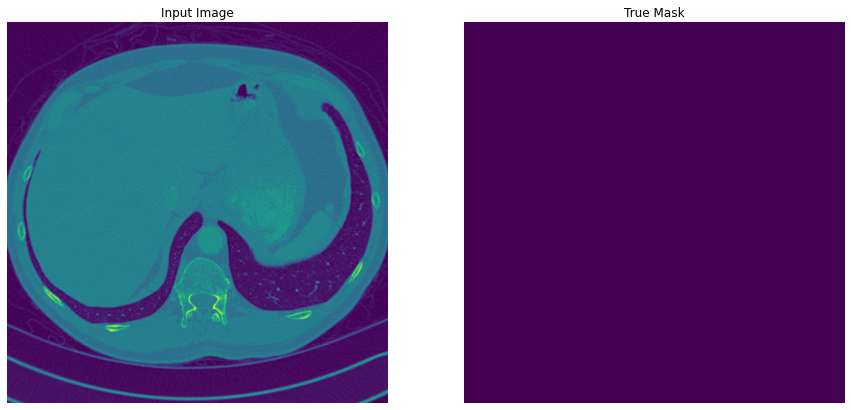

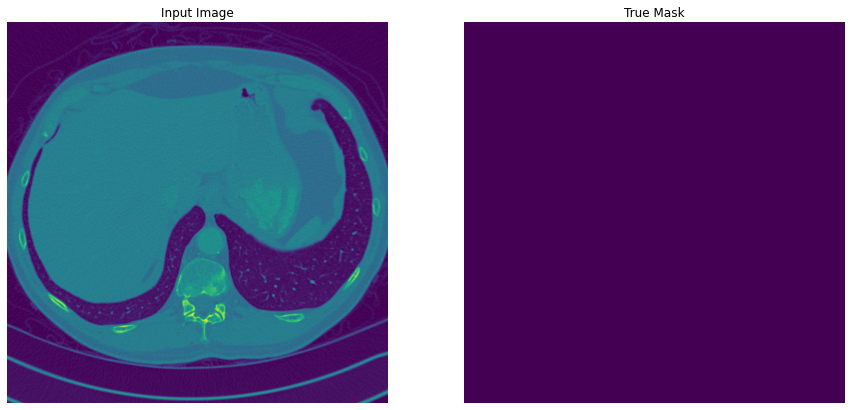

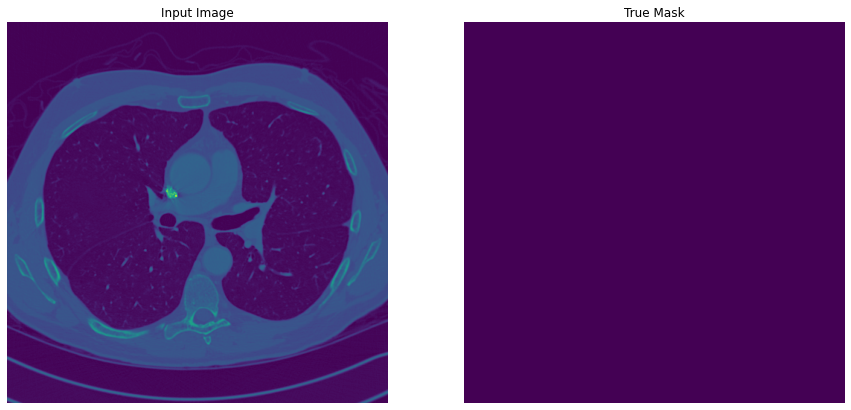

In [198]:
for images, masks in ds_test.shuffle(300).take(5):
    sample_image, sample_mask = images[:,:,0], masks[:,:,0]
    display([sample_image, sample_mask])

In [20]:
#!pip install git+https://github.com/jakeret/unet.git

In [21]:
#!pip list | grep tensorflow

In [22]:
#!pip list | grep unet

In [23]:
#!pip install tensorflow-gpu

In [24]:
import tensorflow as tf
tf.test.gpu_device_name()

2021-09-23 07:17:53.998642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-23 07:17:53.998997: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1734] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-09-23 07:17:53.999154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-23 07:17:53.999507: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-23 07:17:53.999743: I tensorflow/core/common_runtime/gp

'/device:GPU:0'

In [25]:
# import unet
# from unet.datasets import circles

In [26]:
# LEARNING_RATE = 1e-3
# unet_model = unet.build_model(channels=1,
#                               num_classes=2,
#                               layer_depth=2,
#                               filters_root=64)
# unet.finalize_model(unet_model, learning_rate=LEARNING_RATE)

In [27]:
# trainer = unet.Trainer(checkpoint_callback=False,
#                        learning_rate_scheduler=unet.SchedulerType.WARMUP_LINEAR_DECAY,
#                        warmup_proportion=0.1,
#                        learning_rate=LEARNING_RATE)
# trainer.fit(unet_model,
#             ds_train,
#             ds_train,
#             epochs=25,
#             batch_size=1)

In [87]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import Model

In [81]:
# def get_model(IMG_HEIGHT, IMG_WIDTH):
#     in1 = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3 ))

#     conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(in1)
#     conv1 = Dropout(0.2)(conv1)
#     conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv1)
#     pool1 = MaxPooling2D((2, 2))(conv1)

#     conv2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool1)
#     conv2 = Dropout(0.2)(conv2)
#     conv2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2)
#     pool2 = MaxPooling2D((2, 2))(conv2)

#     conv3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool2)
#     conv3 = Dropout(0.2)(conv3)
#     conv3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv3)
#     pool3 = MaxPooling2D((2, 2))(conv3)

#     conv4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool3)
#     conv4 = Dropout(0.2)(conv4)
#     conv4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv4)

#     up1 = concatenate([UpSampling2D((2, 2))(conv4), conv3], axis=-1)
#     conv5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up1)
#     conv5 = Dropout(0.2)(conv5)
#     conv5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv5)
    
#     up2 = concatenate([UpSampling2D((2, 2))(conv5), conv2], axis=-1)
#     conv6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up2)
#     conv6 = Dropout(0.2)(conv6)
#     conv6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv6)

#     up2 = concatenate([UpSampling2D((2, 2))(conv6), conv1], axis=-1)
#     conv7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up2)
#     conv7 = Dropout(0.2)(conv7)
#     conv7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv7)
#     segmentation = Conv2D(3, (1, 1), activation='sigmoid', name='seg')(conv7)

#     model = Model(inputs=[in1], outputs=[segmentation])

#     losses = {'seg': 'binary_crossentropy'
#             }

#     metrics = {'seg': ['acc']
#                 }
#     model.compile(optimizer="adam", loss = losses, metrics=metrics)

#     return model

In [82]:
# model = get_model(512, 512)
# model.summary()

In [31]:
# !curl -O https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
# !curl -O https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
# !tar -xf images.tar.gz
# !tar -xf annotations.tar.gz

In [44]:
# import os

# input_dir = "images/"
# target_dir = "annotations/trimaps/"
# img_size = (160, 160)
# num_classes = 3
# batch_size = 32

# input_img_paths = sorted(
#     [
#         os.path.join(input_dir, fname)
#         for fname in os.listdir(input_dir)
#         if fname.endswith(".jpg")
#     ]
# )
# target_img_paths = sorted(
#     [
#         os.path.join(target_dir, fname)
#         for fname in os.listdir(target_dir)
#         if fname.endswith(".png") and not fname.startswith(".")
#     ]
# )

# print("Number of samples:", len(input_img_paths))

# for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
#     print(input_path, "|", target_path)

In [33]:
# from IPython.display import Image, display
# from tensorflow.keras.preprocessing.image import load_img
# import PIL
# from PIL import ImageOps

# # Display input image #7
# display(Image(filename=input_img_paths[9]))

# # Display auto-contrast version of corresponding target (per-pixel categories)
# img = PIL.ImageOps.autocontrast(load_img(target_img_paths[9]))
# display(img)

In [34]:
# from tensorflow import keras
# import numpy as np
# from tensorflow.keras.preprocessing.image import load_img


# class OxfordPets(keras.utils.Sequence):
#     """Helper to iterate over the data (as Numpy arrays)."""

#     def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
#         self.batch_size = batch_size
#         self.img_size = img_size
#         self.input_img_paths = input_img_paths
#         self.target_img_paths = target_img_paths

#     def __len__(self):
#         return len(self.target_img_paths) // self.batch_size

#     def __getitem__(self, idx):
#         """Returns tuple (input, target) correspond to batch #idx."""
#         i = idx * self.batch_size
#         batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
#         batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
#         x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
#         for j, path in enumerate(batch_input_img_paths):
#             img = load_img(path, target_size=self.img_size)
#             x[j] = img
#         y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
#         for j, path in enumerate(batch_target_img_paths):
#             img = load_img(path, target_size=self.img_size, color_mode="grayscale")
#             y[j] = np.expand_dims(img, 2)
#             # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
#             y[j] -= 1
#         return x, y

In [35]:
# import random

# # Split our img paths into a training and a validation set
# val_samples = 1000
# random.Random(1337).shuffle(input_img_paths)
# random.Random(1337).shuffle(target_img_paths)
# train_input_img_paths = input_img_paths[:-val_samples]
# train_target_img_paths = target_img_paths[:-val_samples]
# val_input_img_paths = input_img_paths[-val_samples:]
# val_target_img_paths = target_img_paths[-val_samples:]

# # Instantiate data Sequences for each split
# train_gen = OxfordPets(
#     batch_size, img_size, train_input_img_paths, train_target_img_paths
# )
# val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [36]:
#a, b = train_gen[0]

In [88]:
img_size = (512, 512)
num_classes = 2
batch_size = 16

In [223]:
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (1,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
#keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 256, 256, 32) 320         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_75 (BatchNo (None, 256, 256, 32) 128         conv2d_59[0][0]                  
__________________________________________________________________________________________________
activation_75 (Activation)      (None, 256, 256, 32) 0           batch_normalization_75[0][0]     
____________________________________________________________________________________________

In [224]:
ds_train = get_train_dataset(CT_image_data_train,CT_mask_data_train)
ds_test = get_train_dataset(CT_image_data_test,CT_mask_data_test)
ds_train = ds_train.shuffle(320).batch(16)
#val data should not have batching, model.fit() will do batching?
ds_test = ds_test.shuffle(320).batch(16)

In [225]:
ds_test

<BatchDataset shapes: ((None, 512, 512, 1), (None, 512, 512, 2)), types: (tf.float32, tf.float32)>

In [226]:
ds_train

<BatchDataset shapes: ((None, 512, 512, 1), (None, 512, 512, 2)), types: (tf.float32, tf.float32)>

In [227]:
model.output_shape

(None, 512, 512, 2)

In [139]:
a = tf.constant([[[[1., 2.]]],[[[5., 4.]]]])
b = tf.constant([[[[1., 1.]]],[[[7., 1.]]]])
#tf.reduce_sum(a * b, axis=[0,1,2])
print(tf.reduce_sum(a, axis=[1,2,3]))
print(tf.reduce_sum(a, axis=[0,1,2]))

tf.Tensor([3. 9.], shape=(2,), dtype=float32)
tf.Tensor([6. 6.], shape=(2,), dtype=float32)


In [157]:
a[:,0,0,:]
print(tf.reduce_sum(a, axis=[1,2]))
print(tf.reduce_sum(a, axis=[1,2,3]))
print(tf.reduce_sum(a, axis=[0,1,2]))

tf.Tensor(
[[1. 2.]
 [5. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor([3. 9.], shape=(2,), dtype=float32)
tf.Tensor([6. 6.], shape=(2,), dtype=float32)


In [180]:
a = tf.constant([[[[0., 0., 1., 1., 0., 0., 0]]],[[[0., 0., 1., 0., 0., 0., 0.]]]])
b = tf.constant([[[[0., 0., 0., 1., 0., 0., 0]]],[[[0., 0., 0., 0., 0., 0., 0.]]]])
print(tf.reduce_sum(a, axis=(1, 2)))
print(tf.reduce_sum(b, axis=(1, 2)))

tf.Tensor(
[[0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]], shape=(2, 7), dtype=float32)
tf.Tensor(
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]], shape=(2, 7), dtype=float32)


In [171]:
a = tf.cast(a, tf.dtypes.float64)
b = tf.cast(b, tf.dtypes.float64)
I = tf.reduce_sum(a * b, axis=(1, 2))
print(I)
U = tf.reduce_sum(a + b, axis=(1, 2)) - I
print(U)
tf.reduce_mean(I / U)

tf.Tensor(
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]], shape=(2, 7), dtype=float64)
tf.Tensor(
[[0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]], shape=(2, 7), dtype=float64)


<tf.Tensor: shape=(), dtype=float64, numpy=nan>

In [173]:
a = tf.cast(a, tf.dtypes.float64)
b = tf.cast(b, tf.dtypes.float64)
I = tf.reduce_sum(a * b, axis=(1, 2, 3))
print(I)
U = tf.reduce_sum(a + b, axis=(1, 2, 3)) - I
print(U)
tf.reduce_mean(I / U)

tf.Tensor([1. 0.], shape=(2,), dtype=float64)
tf.Tensor([2. 1.], shape=(2,), dtype=float64)


<tf.Tensor: shape=(), dtype=float64, numpy=0.25>

In [177]:
smooth = 1
intersection = tf.reduce_sum(a * b, axis=[1,2,3])
union = tf.reduce_sum(a, axis=[1,2,3]) + tf.reduce_sum(b, axis=[1,2,3])
tf.reduce_mean( (2. * intersection + smooth) / (union + smooth), axis=0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.625>

In [222]:
ds_test

<BatchDataset shapes: ((None, 512, 512, 1), (None, 512, 512, 2)), types: (tf.float32, tf.float32)>

In [220]:
ds_train

<BatchDataset shapes: ((None, 512, 512, 1), (None, 512, 512, 2)), types: (tf.float32, tf.float32)>

In [228]:
from keras import backend as K
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
def dice_coef(y_true, y_pred, smooth=1):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
    union = tf.reduce_sum(y_true, axis=[1,2,3]) + tf.reduce_sum(y_pred, axis=[1,2,3])
    return tf.reduce_mean( (2. * intersection + smooth) / (union + smooth), axis=0)

# def mean_iou(y_true, y_pred):
#     y_true = tf.cast(y_true, tf.dtypes.float64)
#     y_pred = tf.cast(y_pred, tf.dtypes.float64)
#     I = tf.reduce_sum(y_pred * y_true, axis=(1, 2))
#     U = tf.reduce_sum(y_pred + y_true, axis=(1, 2)) - I
#     return tf.reduce_mean(I / U)

def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

#model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=[dice_coef, mean_iou])

callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
epochs = 25
history = model.fit(ds_train, epochs=epochs, validation_data=ds_test, callbacks=callbacks)

Epoch 1/25
118/118 [==============================] - 191s 2s/step - loss: 0.0754 - dice_coef: 0.9925 - mean_iou: 0.4963 - val_loss: 0.0011 - val_dice_coef: 1.0000 - val_mean_iou: 0.5000
Epoch 2/25
118/118 [==============================] - 187s 2s/step - loss: 0.0043 - dice_coef: 0.9987 - mean_iou: 0.4993 - val_loss: 8.8380e-04 - val_dice_coef: 1.0000 - val_mean_iou: 0.5000
Epoch 3/25
118/118 [==============================] - 187s 2s/step - loss: 0.0020 - dice_coef: 0.9996 - mean_iou: 0.4998 - val_loss: 6.8776e-04 - val_dice_coef: 1.0000 - val_mean_iou: 0.5000
Epoch 4/25
118/118 [==============================] - 187s 2s/step - loss: 0.0016 - dice_coef: 0.9996 - mean_iou: 0.4999 - val_loss: 0.0014 - val_dice_coef: 1.0000 - val_mean_iou: 0.5000
Epoch 5/25
118/118 [==============================] - 187s 2s/step - loss: 0.0014 - dice_coef: 0.9994 - mean_iou: 0.4998 - val_loss: 0.0016 - val_dice_coef: 1.0000 - val_mean_iou: 0.5000
Epoch 6/25
118/118 [==============================] - 187

In [221]:
model.evaluate(ds_test)

98/98 [==============================] - 40s 376ms/step - loss: 5.5371e-04 - dice_coef: 1.0000 - mean_iou: 0.5000


[0.0005537146935239434, 0.9999590516090393, 0.4999791383743286]

In [231]:
history.history['val_loss']

[0.0010635093785822392,
 0.0008838046342134476,
 0.0006877629202790558,
 0.0013641304103657603,
 0.0015939020086079836,
 0.0009870071662589908,
 0.0015042992308735847,
 0.0008939673425629735,
 0.0010082272347062826,
 0.001202841172926128,
 0.0007157313521020114,
 0.0009874537354335189,
 0.0005706144729629159,
 0.0006370800547301769,
 0.0020984886214137077,
 0.0005856667994521558,
 0.0007005248335190117,
 0.0006221610237844288,
 0.0010281644063070416,
 0.0009039140422828496,
 0.0010204784339293838,
 0.0011563629377633333,
 0.0009395101806148887,
 0.0007165780407376587,
 0.0009634668822400272]

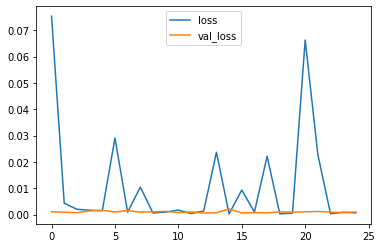

In [247]:
val_loss_metric = history.history['val_loss']
loss_metric = history.history['loss']
x = np.arange(len(val_loss_metric))
plt.plot(x, loss_metric, label='loss')
plt.plot(x, val_loss_metric, label='val_loss')
plt.legend()

In [248]:
history.history

{'loss': [0.07535067200660706,
  0.004304432775825262,
  0.002010576194152236,
  0.0016499232733622193,
  0.001427853712812066,
  0.02902889810502529,
  0.0009095562854781747,
  0.01041964441537857,
  0.0005834561306983232,
  0.0009467678610235453,
  0.0016810728702694178,
  0.00037979960325174034,
  0.001336453715339303,
  0.02365736849606037,
  0.00023508611775469035,
  0.00931416917592287,
  0.0009451068472117186,
  0.02217717096209526,
  0.00026979134418070316,
  0.0005394820473156869,
  0.06632902473211288,
  0.022722432389855385,
  0.0002968781627714634,
  0.0008619187865406275,
  0.0006478848517872393],
 'dice_coef': [0.9925232529640198,
  0.998672366142273,
  0.9995559453964233,
  0.9995682239532471,
  0.9993705749511719,
  0.9928926229476929,
  0.9995850324630737,
  0.9970077872276306,
  0.9998155236244202,
  0.9997632503509521,
  0.9991077780723572,
  0.9998812079429626,
  0.9994709491729736,
  0.9924828410148621,
  0.9999160170555115,
  0.9959320425987244,
  0.99948215484619

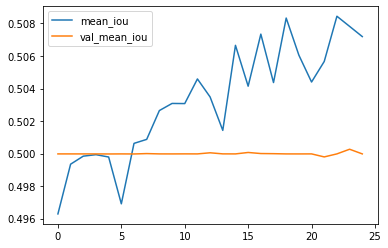

In [249]:
mean_iou = history.history['mean_iou']
val_mean_iou = history.history['val_mean_iou']
x = np.arange(len(val_mean_iou))
plt.plot(x, mean_iou, label='mean_iou')
plt.plot(x, val_mean_iou, label='val_mean_iou')
plt.legend()

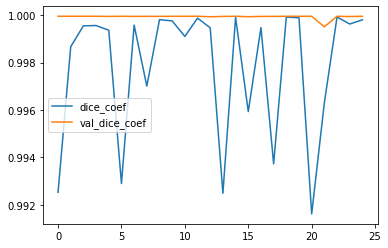

In [250]:
dice_coef = history.history['dice_coef']
val_dice_coef = history.history['val_dice_coef']
x = np.arange(len(val_dice_coef))
plt.plot(x, dice_coef, label='dice_coef')
plt.plot(x, val_dice_coef, label='val_dice_coef')
plt.legend()

In [68]:
for a, b in ds_train.take(1):
    print(b[0])

tf.Tensor(
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]], shape=(512, 512, 1), dtype=float32)


In [71]:
np.min(b[0])

0.0